<a href="https://colab.research.google.com/github/CamiloEFB/challenge/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [762]:
# importar librerias necesarias para exploratory analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [763]:
df= pd.read_csv('/content/dataset_SCL.csv')

In [764]:
df.shape

(68206, 18)

In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [766]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


Problema
El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:
Fecha-I : Fecha y hora programada del vuelo.
Vlo-I : Número de vuelo programado.
Ori-I : Código de ciudad de origen programado.
Des-I : Código de ciudad de destino programado.
Emp-I : Código aerolínea de vuelo programado.
Fecha-O : Fecha y hora de operación del vuelo.
Vlo-O : Número de vuelo de operación del vuelo.
Ori-O : Código de ciudad de origen de operación
Des-O : Código de ciudad de destino de operación.
Emp-O : Código aerolínea de vuelo operado.
DIA : Día del mes de operación del vuelo.
MES : Número de mes de operación del vuelo.
AÑO : Año de operación del vuelo.
DIANOM : Día de la semana de operación del vuelo.
TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
OPERA : Nombre de aerolínea que opera.
SIGLAORI : Nombre ciudad origen.
SIGLADES : Nombre ciudad destino.

In [767]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
data muy redundante que luego veremos como se distribuye 

In [768]:
df['Fecha-I']= pd.to_datetime(df["Fecha-I"], format="%Y-%m-%d %H:%M:%S")
df['Fecha-O']= pd.to_datetime(df["Fecha-O"], format="%Y-%m-%d %H:%M:%S")


In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

# creacion de variables

In [770]:
df['fecha1']= pd.to_datetime(df["Fecha-I"], format="%Y-%m-%d").dt.strftime("%m%d")
df['fecha1']=df['fecha1'].astype(int)

In [771]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha1
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,101
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,102
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,103
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,104
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1222
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1225
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1227
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1229


In [772]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [773]:
def funo(x):
        if x >= 1215:
          return 1
        elif x<=303:
          return 1
        elif (x >= 715) and (x <= 731 ):
          return 1
        elif (x >= 911) and (x <= 930 ):
          return 1
        else:
          return 0
        


In [774]:
df['temporada_alta'] = df['fecha1'].apply(funo)

In [775]:
df.temporada_alta.value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

In [777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [778]:
df=df.dropna()

In [779]:

df['dif_min'] = ((df['Fecha-O'] - df['Fecha-I'])/np.timedelta64(1, 'm'))
df['dif_min'] = df['dif_min'].astype(int)


In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68205 non-null  datetime64[ns]
 1   Vlo-I           68205 non-null  object        
 2   Ori-I           68205 non-null  object        
 3   Des-I           68205 non-null  object        
 4   Emp-I           68205 non-null  object        
 5   Fecha-O         68205 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68205 non-null  object        
 8   Des-O           68205 non-null  object        
 9   Emp-O           68205 non-null  object        
 10  DIA             68205 non-null  int64         
 11  MES             68205 non-null  int64         
 12  AÑO             68205 non-null  int64         
 13  DIANOM          68205 non-null  object        
 14  TIPOVUELO       68205 non-null  object        
 15  OP

In [781]:
def is_more_than_15(x):
        if x > 15:
                return 1
        else:
                return 0

In [782]:
df['atraso_15'] = df['dif_min'].apply(is_more_than_15)

In [783]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha1,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,101,1,3,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,102,1,9,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,103,1,9,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,104,1,3,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,105,1,-2,0


In [784]:
df['atraso_15'].value_counts()

0    55591
1    12614
Name: atraso_15, dtype: int64

In [785]:
df['Fechahora']= pd.to_datetime(df["Fecha-I"], format="%H:%M:%S").dt.strftime("%H")

In [786]:
df['Fechahora']=df['Fechahora'].astype(int)

In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68205 non-null  datetime64[ns]
 1   Vlo-I           68205 non-null  object        
 2   Ori-I           68205 non-null  object        
 3   Des-I           68205 non-null  object        
 4   Emp-I           68205 non-null  object        
 5   Fecha-O         68205 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68205 non-null  object        
 8   Des-O           68205 non-null  object        
 9   Emp-O           68205 non-null  object        
 10  DIA             68205 non-null  int64         
 11  MES             68205 non-null  int64         
 12  AÑO             68205 non-null  int64         
 13  DIANOM          68205 non-null  object        
 14  TIPOVUELO       68205 non-null  object        
 15  OP

In [788]:
def f(x):
    if (x >= 5) and (x < 12):
        return 'mañana'
    elif (x >= 12) and (x < 19 ):
        return 'tarde'
    else:
          return 'noche'

In [789]:
df['periodo_dia'] = df['Fechahora'].apply(f)

In [790]:
df['periodo_dia'].value_counts()

tarde     25506
mañana    25351
noche     17348
Name: periodo_dia, dtype: int64

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68205 non-null  datetime64[ns]
 1   Vlo-I           68205 non-null  object        
 2   Ori-I           68205 non-null  object        
 3   Des-I           68205 non-null  object        
 4   Emp-I           68205 non-null  object        
 5   Fecha-O         68205 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68205 non-null  object        
 8   Des-O           68205 non-null  object        
 9   Emp-O           68205 non-null  object        
 10  DIA             68205 non-null  int64         
 11  MES             68205 non-null  int64         
 12  AÑO             68205 non-null  int64         
 13  DIANOM          68205 non-null  object        
 14  TIPOVUELO       68205 non-null  object        
 15  OP

# exploratory analysis de variables 

In [792]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

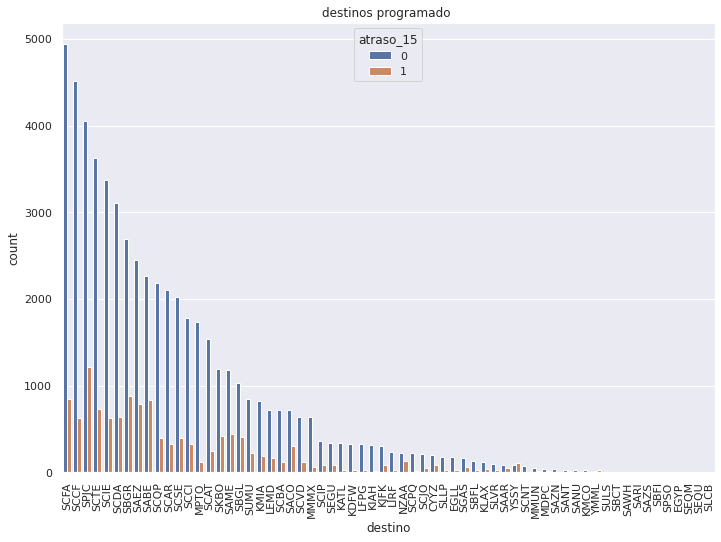

In [894]:
data = df.groupby("atraso_15")["Des-I"].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x="Des-I", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("destinos programado ")
plt.xlabel("destino")
plt.show()


In [794]:
data = df.groupby("atraso_15")["Des-I"].value_counts().rename("count").reset_index().pivot_table(index="Des-I", columns="atraso_15").reset_index()
data.columns = ["Des-I", "atraso_15=0", "atraso_15=1"]
data["Des-I"] = data["Des-I"].astype(str).str[:7]
data.sort_values("Des-I", ascending=True)

,Des-I,atraso_15=0,atraso_15=1
0,CYYZ,194.0,89.0
1,EGLL,176.0,29.0
2,EGYP,NaN,1.0
3,KATL,337.0,21.0
4,KDFW,332.0,25.0
...,...,...,...
59,SPSO,1.0,NaN
60,SULS,5.0,1.0
61,SUMU,846.0,220.0
62,YMML,17.0,21.0


En la variable "Des-I", esta muy seoarada muchos factores que influyen un poco asi que luego vamos a tratar con ellas  

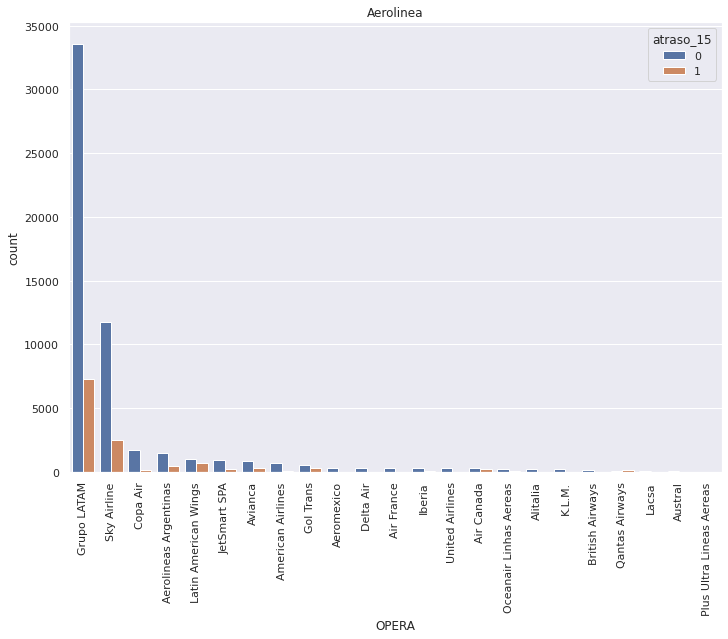

In [895]:
data = df.groupby("atraso_15")['OPERA'].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x="OPERA", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("Aerolinea")
plt.xlabel("OPERA")
plt.show()


In [796]:
data = df.groupby("atraso_15")["OPERA"].value_counts().rename("count").reset_index().pivot_table(index="OPERA", columns="atraso_15").reset_index()
data.columns = ["OPERA", "atraso_15=0", "atraso_15=1"]
data["Des-I"] = data["OPERA"].astype(str).str[:7]
data.sort_values("Des-I", ascending=True)

,OPERA,atraso_15=0,atraso_15=1,Des-I
0,Aerolineas Argentinas,1481,468,Aerolin
1,Aeromexico,341,10,Aeromex
2,Air Canada,307,258,Air Can
3,Air France,328,30,Air Fra
4,Alitalia,230,29,Alitali
5,American Airlines,706,51,America
6,Austral,59,15,Austral
7,Avianca,846,306,Avianca
8,British Airways,176,29,British
9,Copa Air,1734,116,Copa Ai


En la variable "OPERA", dos valores mandan Grupo LATAM y Sky Airline asi que consideraremos estos valores 

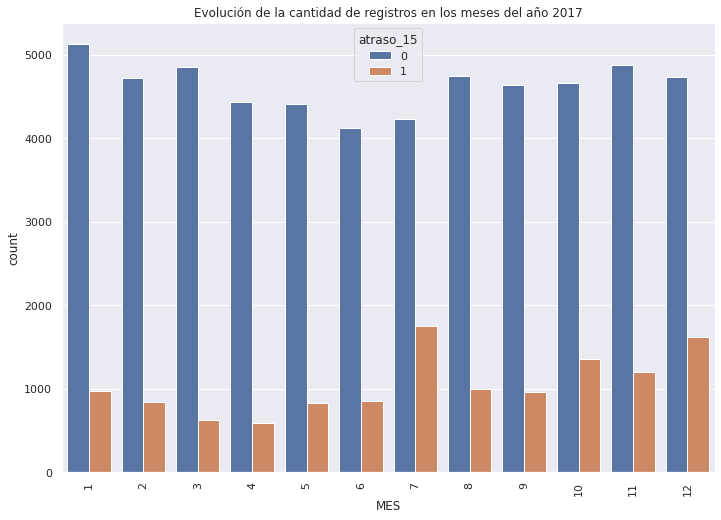

In [897]:
data = df.groupby("atraso_15")['MES'].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x="MES", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("Evolución de la cantidad de registros en los meses del año 2017")
plt.xlabel("MES")
plt.show()


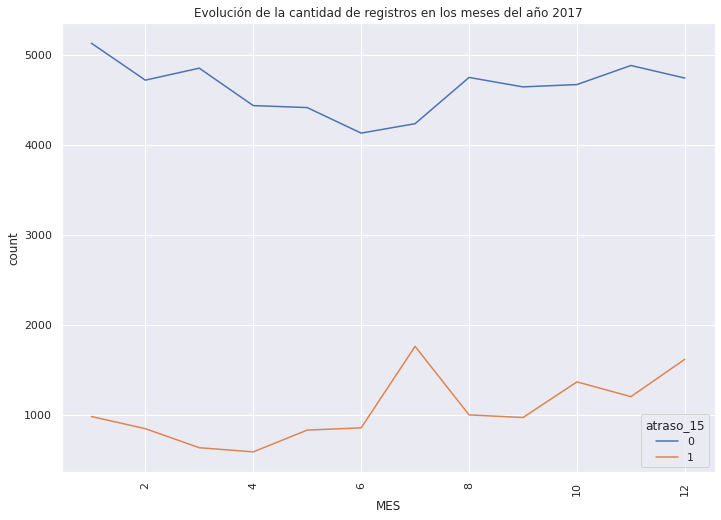

In [898]:
data = df.groupby("atraso_15")['MES'].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.lineplot(data=data, x="MES", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("Evolución de la cantidad de registros en los meses del año 2017")
plt.xlabel("MES")
plt.show()


In [799]:
data = df.groupby("atraso_15")['MES'].value_counts().rename("count").reset_index().pivot_table(index='MES', columns="atraso_15").reset_index()
data.columns = ['MES', "atraso_15=0", "atraso_15=1"]
data['MES'] = data['MES'].astype(str).str[:7]
data

,MES,atraso_15=0,atraso_15=1
0,1,5129,978
1,2,4718,843
2,3,4851,631
3,4,4435,585
4,5,4413,827
5,6,4129,852
6,7,4234,1758
7,8,4748,996
8,9,4643,967
9,10,4669,1363


Como se distribuye la variable mes para cortar las variables en train y test 

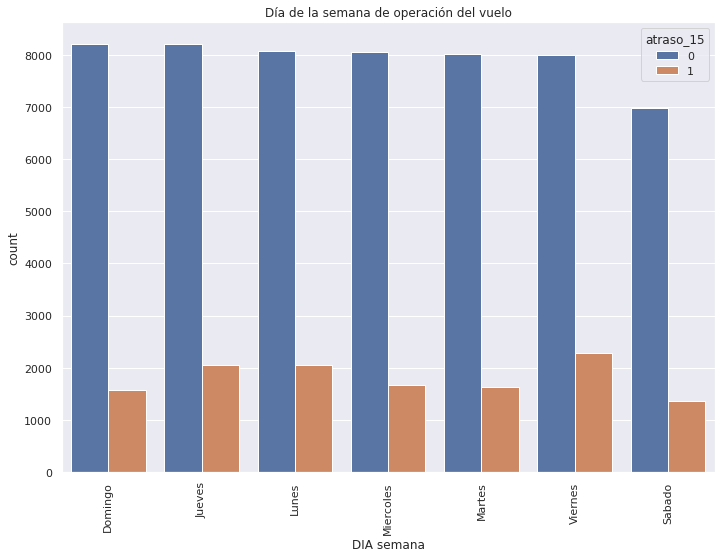

In [899]:

data = df.groupby("atraso_15")['DIANOM'].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x="DIANOM", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("Día de la semana de operación del vuelo")
plt.xlabel("DIA semana")
plt.show()


In [801]:
data = df.groupby("atraso_15")['DIANOM'].value_counts().rename("count").reset_index().pivot_table(index='DIANOM', columns="atraso_15").reset_index()
data.columns = ['DIANOM', "atraso_15=0", "atraso_15=1"]
data['DIANOM'] = data['DIANOM'].astype(str).str[:7]
data

,DIANOM,atraso_15=0,atraso_15=1
0,Domingo,8218,1578
1,Jueves,8205,2045
2,Lunes,8083,2048
3,Martes,8028,1634
4,Miercol,8061,1661
5,Sabado,6989,1363
6,Viernes,8007,2285


Como se distribuye la variable DIANOM vemos que se encuentra sobrerepresentado el vierner de DIANOM

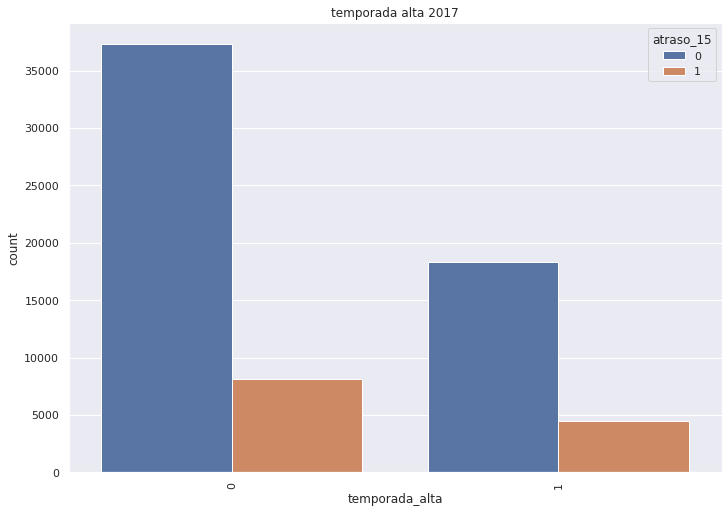

In [900]:
data = df.groupby("atraso_15")["temporada_alta"].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x="temporada_alta", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("temporada alta 2017")
plt.xlabel("temporada_alta")
plt.show()

In [803]:
data = df.groupby("atraso_15")["temporada_alta"].value_counts().rename("count").reset_index().pivot_table(index="temporada_alta", columns="atraso_15").reset_index()
data.columns = ["temporada_alta", "atraso_15=0", "atraso_15=1"]
data["temporada_alta"] = data["temporada_alta"].astype(str).str[:7]
data

,temporada_alta,atraso_15=0,atraso_15=1
0,0,37300,8144
1,1,18291,4470


En la variable temporada alta se ve que la proporcion de vuelos atrasados es mucho mayor que las no son temporada alta 

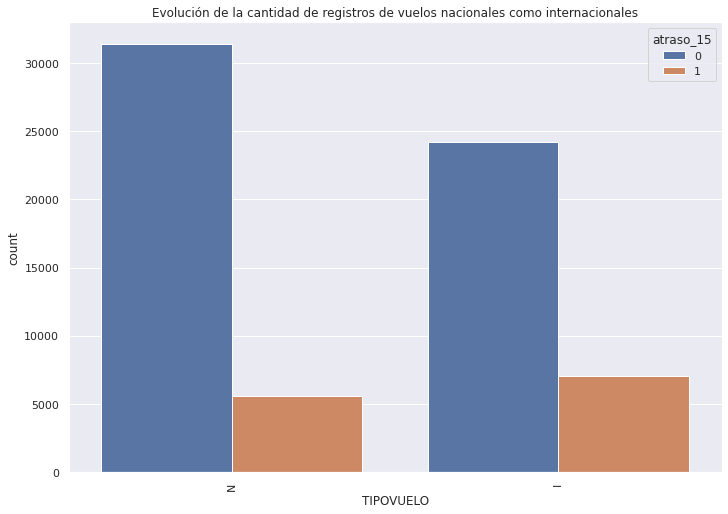

In [901]:
data = df.groupby("atraso_15")["TIPOVUELO"].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x="TIPOVUELO", y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("Evolución de la cantidad de registros de vuelos nacionales como internacionales")
plt.xlabel("TIPOVUELO")
plt.show()




In [891]:
data = df.groupby("atraso_15")["TIPOVUELO"].value_counts().rename("count").reset_index().pivot_table(index="TIPOVUELO", columns="atraso_15").reset_index()
data.columns = ["TIPOVUELO", "atraso_15=0", "atraso_15=1"]
data["TIPOVUELO"] = data["TIPOVUELO"].astype(str).str[:7]
data

,TIPOVUELO,atraso_15=0,atraso_15=1
0,I,24191,7048
1,N,31400,5566


En la variable "TIPOVUELO" se ve que los vuelos internacionales se atrasan mas que los nacionales 

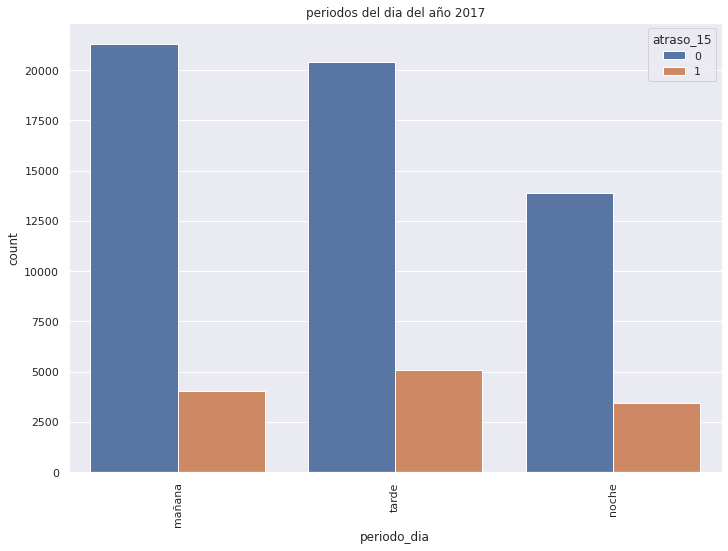

In [902]:
data = df.groupby("atraso_15")['periodo_dia'].value_counts().rename("count").reset_index()#.pivot_table(index="Ano_Mes", columns="Target_")
sns.barplot(data=data, x='periodo_dia', y="count",hue="atraso_15")
plt.xticks(rotation=90)
plt.title("periodos del dia del año 2017")
plt.xlabel('periodo_dia')
plt.show()


In [807]:
data = df.groupby("atraso_15")['periodo_dia'].value_counts().rename("count").reset_index().pivot_table(index='periodo_dia', columns="atraso_15").reset_index()
data.columns = ['periodo_dia', "atraso_15=0", "atraso_15=1"]
data['periodo_dia'] = data['periodo_dia'].astype(str).str[:7]
data

,periodo_dia,atraso_15=0,atraso_15=1
0,mañana,21293,4058
1,noche,13878,3470
2,tarde,20420,5086


In [892]:
### ¿Qué variables esperarías que más inﬂuyeran en predecir atrasos?
# si es temporada alta , vuelo int o nac, dia de la semana , si es dia viernes , mes 
# las otras variables no son tan importantes la de aerolineas 2 son las mas importantes que tienen un 20% aproximados de atrasos

modelo ml 

primero split 

In [809]:
df.columns.to_list()

['Fecha-I',
 'Vlo-I',
 'Ori-I',
 'Des-I',
 'Emp-I',
 'Fecha-O',
 'Vlo-O',
 'Ori-O',
 'Des-O',
 'Emp-O',
 'DIA',
 'MES',
 'AÑO',
 'DIANOM',
 'TIPOVUELO',
 'OPERA',
 'SIGLAORI',
 'SIGLADES',
 'fecha1',
 'temporada_alta',
 'dif_min',
 'atraso_15',
 'Fechahora',
 'periodo_dia']

In [810]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha1,temporada_alta,dif_min,atraso_15,Fechahora,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,101,1,3,0,23,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,102,1,9,0,23,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,103,1,9,0,23,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,104,1,3,0,23,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,105,1,-2,0,23,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1222,1,46,1,14,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1225,1,16,1,14,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1227,1,40,1,14,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1229,1,13,0,14,tarde


In [811]:
df['temporada_alta'].value_counts()

0    45444
1    22761
Name: temporada_alta, dtype: int64

In [812]:
f=['temporada_alta',
 'dif_min',
 'atraso_15',

 'periodo_dia']

In [813]:
df_exp=df[f]

In [864]:
df_exp

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3,0,noche
1,1,9,0,noche
2,1,9,0,noche
3,1,3,0,noche
4,1,-2,0,noche
...,...,...,...,...
68201,1,46,1,tarde
68202,1,16,1,tarde
68203,1,40,1,tarde
68204,1,13,0,tarde


In [865]:
df_exp['periodo_dia'].value_counts()

tarde     25506
mañana    25351
noche     17348
Name: periodo_dia, dtype: int64

In [869]:
df_exp.to_csv('synthetic_features.csv', index= False)### variables que pidieron por separado 

In [817]:
# variables que ocupare 

In [819]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha1,temporada_alta,dif_min,atraso_15,Fechahora,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,101,1,3,0,23,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,102,1,9,0,23,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,103,1,9,0,23,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,104,1,3,0,23,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,105,1,-2,0,23,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1222,1,46,1,14,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1225,1,16,1,14,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1227,1,40,1,14,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1229,1,13,0,14,tarde


In [820]:
df.columns.to_list()

['Fecha-I',
 'Vlo-I',
 'Ori-I',
 'Des-I',
 'Emp-I',
 'Fecha-O',
 'Vlo-O',
 'Ori-O',
 'Des-O',
 'Emp-O',
 'DIA',
 'MES',
 'AÑO',
 'DIANOM',
 'TIPOVUELO',
 'OPERA',
 'SIGLAORI',
 'SIGLADES',
 'fecha1',
 'temporada_alta',
 'dif_min',
 'atraso_15',
 'Fechahora',
 'periodo_dia']

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68205 non-null  datetime64[ns]
 1   Vlo-I           68205 non-null  object        
 2   Ori-I           68205 non-null  object        
 3   Des-I           68205 non-null  object        
 4   Emp-I           68205 non-null  object        
 5   Fecha-O         68205 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68205 non-null  object        
 8   Des-O           68205 non-null  object        
 9   Emp-O           68205 non-null  object        
 10  DIA             68205 non-null  int64         
 11  MES             68205 non-null  int64         
 12  AÑO             68205 non-null  int64         
 13  DIANOM          68205 non-null  object        
 14  TIPOVUELO       68205 non-null  object        
 15  OP

las que encuentroque serian utiles

In [822]:
fi=[
 'Des-I',

 'MES',
 
 'DIANOM',
 'TIPOVUELO',
 'OPERA',
 'temporada_alta',

 'periodo_dia',
  'atraso_15',]

In [823]:
dfi=df[fi]
dfi

,Des-I,MES,DIANOM,TIPOVUELO,OPERA,temporada_alta,periodo_dia,atraso_15
0,KMIA,1,Domingo,I,American Airlines,1,noche,0
1,KMIA,1,Lunes,I,American Airlines,1,noche,0
2,KMIA,1,Martes,I,American Airlines,1,noche,0
3,KMIA,1,Miercoles,I,American Airlines,1,noche,0
4,KMIA,1,Jueves,I,American Airlines,1,noche,0
...,...,...,...,...,...,...,...,...
68201,SPJC,12,Viernes,I,JetSmart SPA,1,tarde,1
68202,SPJC,12,Lunes,I,JetSmart SPA,1,tarde,1
68203,SPJC,12,Miercoles,I,JetSmart SPA,1,tarde,1
68204,SPJC,12,Viernes,I,JetSmart SPA,1,tarde,0


importar librerias para machine learning

In [824]:
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

ver que variables hay pocos valores

In [825]:
unique_category = []
for i in dfi.columns:
    if df[i].unique().shape[0] <= 3:
        unique_category.append(i)
        print(i, dfi[i].unique(), "\n")

TIPOVUELO ['I' 'N'] 

temporada_alta [1 0] 

periodo_dia ['noche' 'tarde' 'mañana'] 

atraso_15 [0 1] 



variables con muchos valores voy a disminuirlos

In [826]:
lista_colapso = dfi["Des-I"].value_counts()[dfi["Des-I"].value_counts() < 2000].index.tolist()
lista_colapso_o= dfi['OPERA'].value_counts()[dfi['OPERA'].value_counts() < 5000].index.tolist()

In [827]:
dfi["Des-I"] = np.where(dfi["Des-I"].isin(lista_colapso), "otras_Des-I", dfi["Des-I"])
dfi['OPERA'] = np.where(dfi['OPERA'].isin(lista_colapso_o), 'otras_OPERA', dfi['OPERA'])

In [828]:
dfi

,Des-I,MES,DIANOM,TIPOVUELO,OPERA,temporada_alta,periodo_dia,atraso_15
0,otras_Des-I,1,Domingo,I,otras_OPERA,1,noche,0
1,otras_Des-I,1,Lunes,I,otras_OPERA,1,noche,0
2,otras_Des-I,1,Martes,I,otras_OPERA,1,noche,0
3,otras_Des-I,1,Miercoles,I,otras_OPERA,1,noche,0
4,otras_Des-I,1,Jueves,I,otras_OPERA,1,noche,0
...,...,...,...,...,...,...,...,...
68201,SPJC,12,Viernes,I,otras_OPERA,1,tarde,1
68202,SPJC,12,Lunes,I,otras_OPERA,1,tarde,1
68203,SPJC,12,Miercoles,I,otras_OPERA,1,tarde,1
68204,SPJC,12,Viernes,I,otras_OPERA,1,tarde,0


In [829]:
dfi.OPERA.value_counts()

Grupo LATAM    40892
Sky Airline    14298
otras_OPERA    13015
Name: OPERA, dtype: int64

In [830]:
dfi['Des-I'].value_counts()  ### destino probablemente no es un buen predictor 

otras_Des-I    20467
SCFA            5787
SPJC            5269
SCCF            5145
SCTE            4357
SCIE            3995
SCDA            3747
SBGR            3570
SAEZ            3240
SABE            3094
SCQP            2583
SCAR            2436
SCSE            2410
SCCI            2105
Name: Des-I, dtype: int64

In [831]:
dfi

,Des-I,MES,DIANOM,TIPOVUELO,OPERA,temporada_alta,periodo_dia,atraso_15
0,otras_Des-I,1,Domingo,I,otras_OPERA,1,noche,0
1,otras_Des-I,1,Lunes,I,otras_OPERA,1,noche,0
2,otras_Des-I,1,Martes,I,otras_OPERA,1,noche,0
3,otras_Des-I,1,Miercoles,I,otras_OPERA,1,noche,0
4,otras_Des-I,1,Jueves,I,otras_OPERA,1,noche,0
...,...,...,...,...,...,...,...,...
68201,SPJC,12,Viernes,I,otras_OPERA,1,tarde,1
68202,SPJC,12,Lunes,I,otras_OPERA,1,tarde,1
68203,SPJC,12,Miercoles,I,otras_OPERA,1,tarde,1
68204,SPJC,12,Viernes,I,otras_OPERA,1,tarde,0


In [832]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Des-I           68205 non-null  object
 1   MES             68205 non-null  int64 
 2   DIANOM          68205 non-null  object
 3   TIPOVUELO       68205 non-null  object
 4   OPERA           68205 non-null  object
 5   temporada_alta  68205 non-null  int64 
 6   periodo_dia     68205 non-null  object
 7   atraso_15       68205 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.7+ MB


In [833]:
to_ignore_feat = ["atraso_15"]
numeric_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'int8']
cat_feat = list(dfi.select_dtypes(exclude=numeric_type).columns.drop(to_ignore_feat , errors="ignore").values)
num_feat = list(dfi.select_dtypes(include=numeric_type).columns.drop(to_ignore_feat , errors="ignore").values)

In [834]:

cat_feat = [column for column in cat_feat if column ]
print(cat_feat)

['Des-I', 'DIANOM', 'TIPOVUELO', 'OPERA', 'periodo_dia']


In [835]:
dfi[cat_feat] = dfi[cat_feat].astype("category")

In [836]:
dfi

,Des-I,MES,DIANOM,TIPOVUELO,OPERA,temporada_alta,periodo_dia,atraso_15
0,otras_Des-I,1,Domingo,I,otras_OPERA,1,noche,0
1,otras_Des-I,1,Lunes,I,otras_OPERA,1,noche,0
2,otras_Des-I,1,Martes,I,otras_OPERA,1,noche,0
3,otras_Des-I,1,Miercoles,I,otras_OPERA,1,noche,0
4,otras_Des-I,1,Jueves,I,otras_OPERA,1,noche,0
...,...,...,...,...,...,...,...,...
68201,SPJC,12,Viernes,I,otras_OPERA,1,tarde,1
68202,SPJC,12,Lunes,I,otras_OPERA,1,tarde,1
68203,SPJC,12,Miercoles,I,otras_OPERA,1,tarde,1
68204,SPJC,12,Viernes,I,otras_OPERA,1,tarde,0


crear dummies de la data categorica solo dejando los valores mas importantes

In [837]:
cat_feat

['Des-I', 'DIANOM', 'TIPOVUELO', 'OPERA', 'periodo_dia']

In [838]:
dummies = pd.get_dummies(dfi[cat_feat])
dfi = pd.concat([dfi, dummies], axis=1)
dfi = dfi.drop(cat_feat, axis=1)

In [839]:
dfi

,MES,temporada_alta,atraso_15,Des-I_SABE,Des-I_SAEZ,Des-I_SBGR,Des-I_SCAR,Des-I_SCCF,Des-I_SCCI,Des-I_SCDA,...,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,TIPOVUELO_N,OPERA_Grupo LATAM,OPERA_Sky Airline,OPERA_otras_OPERA,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,12,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
68202,12,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
68203,12,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
68204,12,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1


In [840]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MES                 68205 non-null  int64
 1   temporada_alta      68205 non-null  int64
 2   atraso_15           68205 non-null  int64
 3   Des-I_SABE          68205 non-null  uint8
 4   Des-I_SAEZ          68205 non-null  uint8
 5   Des-I_SBGR          68205 non-null  uint8
 6   Des-I_SCAR          68205 non-null  uint8
 7   Des-I_SCCF          68205 non-null  uint8
 8   Des-I_SCCI          68205 non-null  uint8
 9   Des-I_SCDA          68205 non-null  uint8
 10  Des-I_SCFA          68205 non-null  uint8
 11  Des-I_SCIE          68205 non-null  uint8
 12  Des-I_SCQP          68205 non-null  uint8
 13  Des-I_SCSE          68205 non-null  uint8
 14  Des-I_SCTE          68205 non-null  uint8
 15  Des-I_SPJC          68205 non-null  uint8
 16  Des-I_otras_Des-I   68205 non-null  uint

Eliminar variables con poca varianza
Se eliminan las variables que cumplan AMBAS condiciones:



1.   *Count of unique values in a feature / sample size < 10%
2.   *Count of most common value / Count of second most common value > 20 times




In [841]:
def counts_ratio(s):
    """Take a pandas series s and return the
    count of its most common value / 
    count of its second most common value."""
    counts = np.sort(np.unique(s, return_counts=True)[1])[-2:]
    return counts[1] / counts[0]


n = dfi.shape[0]/10

variable = []
condicion_1 = []
condicion_2 = []

for i in dfi:
    variable.append(i)
    condicion_1.append(dfi[i].unique().shape[0] < n)
    
    try:
        condicion_2.append(counts_ratio(dfi[i]) > 20)
    except:
        condicion_2.append(np.nan)
    
results = pd.DataFrame({"Variables": variable,
          "Condicion_1": condicion_1,
          "Condicion_2": condicion_2})

results["If_delete"] = results["Condicion_1"]*results["Condicion_2"]
results["If_delete"].value_counts()

False    26
True      6
Name: If_delete, dtype: int64

In [842]:
mask = results["If_delete"] == True
cols_LowVariance_to_drop = results.loc[mask,"Variables"]
cols_LowVariance_to_drop.tolist()

['Des-I_SABE',
 'Des-I_SAEZ',
 'Des-I_SCAR',
 'Des-I_SCCI',
 'Des-I_SCQP',
 'Des-I_SCSE']

In [843]:
prev_shape = dfi.shape[1]
dfi = dfi.drop(cols_LowVariance_to_drop, axis=1)
post_shape = dfi.shape[1]
print(prev_shape, "-", len(cols_LowVariance_to_drop), "=", post_shape)

32 - 6 = 26


In [844]:
dfi

,MES,temporada_alta,atraso_15,Des-I_SBGR,Des-I_SCCF,Des-I_SCDA,Des-I_SCFA,Des-I_SCIE,Des-I_SCTE,Des-I_SPJC,...,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,TIPOVUELO_N,OPERA_Grupo LATAM,OPERA_Sky Airline,OPERA_otras_OPERA,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,12,1,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
68202,12,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
68203,12,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
68204,12,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1


eliminar variables que esten muy correlacionadas > 0.8 absoluto

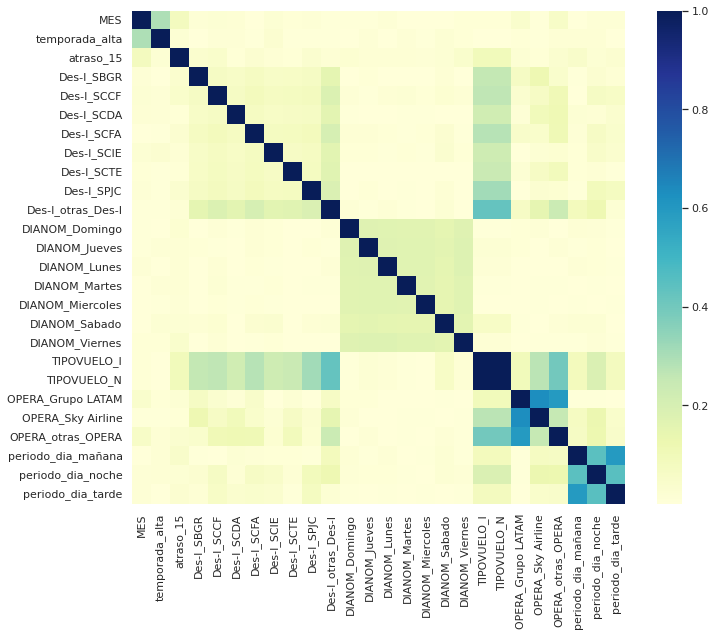

In [845]:
###############################################################################
#              Feature Selection: Removing highly correlated features      #
###############################################################################
# Filter Method: 
# Make correlation matrix
corr_matrix = dfi.corr().abs()

# Draw the heatmap
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
f.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 1080)

# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features
dfi = dfi.drop(to_drop, axis = 1)


In [846]:
dfi

,MES,temporada_alta,atraso_15,Des-I_SBGR,Des-I_SCCF,Des-I_SCDA,Des-I_SCFA,Des-I_SCIE,Des-I_SCTE,Des-I_SPJC,...,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,OPERA_Grupo LATAM,OPERA_Sky Airline,OPERA_otras_OPERA,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,12,1,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1
68202,12,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
68203,12,1,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
68204,12,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1


In [847]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MES                 68205 non-null  int64
 1   temporada_alta      68205 non-null  int64
 2   atraso_15           68205 non-null  int64
 3   Des-I_SBGR          68205 non-null  uint8
 4   Des-I_SCCF          68205 non-null  uint8
 5   Des-I_SCDA          68205 non-null  uint8
 6   Des-I_SCFA          68205 non-null  uint8
 7   Des-I_SCIE          68205 non-null  uint8
 8   Des-I_SCTE          68205 non-null  uint8
 9   Des-I_SPJC          68205 non-null  uint8
 10  Des-I_otras_Des-I   68205 non-null  uint8
 11  DIANOM_Domingo      68205 non-null  uint8
 12  DIANOM_Jueves       68205 non-null  uint8
 13  DIANOM_Lunes        68205 non-null  uint8
 14  DIANOM_Martes       68205 non-null  uint8
 15  DIANOM_Miercoles    68205 non-null  uint8
 16  DIANOM_Sabado       68205 non-null  uint

split la data por que esta por mes dejar los ultimos 3 para testing como se ve anteriormente que se mantiene las proporciones casi todo el año

In [848]:
mask_train = dfi["MES"] <= 9
mask_test = dfi["MES"] >= 10
train = dfi.loc[mask_train]
test = dfi.loc[mask_test]

X_train = train.drop("atraso_15", axis=1)
X_test = test.drop("atraso_15", axis=1)


y_train = train["atraso_15"]
y_test = test["atraso_15"]



In [849]:
X_train= X_train.drop("MES", axis=1)
X_test= X_test.drop("MES", axis=1)

In [853]:
X_train

,temporada_alta,Des-I_SBGR,Des-I_SCCF,Des-I_SCDA,Des-I_SCFA,Des-I_SCIE,Des-I_SCTE,Des-I_SPJC,Des-I_otras_Des-I,DIANOM_Domingo,...,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,OPERA_Grupo LATAM,OPERA_Sky Airline,OPERA_otras_OPERA,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49733,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
49734,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
49735,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
66918,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [854]:
X_test

,temporada_alta,Des-I_SBGR,Des-I_SCCF,Des-I_SCDA,Des-I_SCFA,Des-I_SCIE,Des-I_SCTE,Des-I_SPJC,Des-I_otras_Des-I,DIANOM_Domingo,...,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,OPERA_Grupo LATAM,OPERA_Sky Airline,OPERA_otras_OPERA,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
49736,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
49737,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
49738,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
49739,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
49740,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,1
68202,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
68203,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
68204,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,1


se probo con distintos seleccionadores de variables como por ejemplo RFECV, mean shap values y MRMR para llegar a unas pocas variables que crea modelos que son mas facilmente explicables 

In [855]:
# recursive feature elimination CRoss validation 
from sklearn.feature_selection import RFECV

forest = RandomForestClassifier(
n_jobs=-1,
max_depth= 5,)
rfecv = RFECV(estimator = forest, cv=5 , min_features_to_select=9)
fit= rfecv.fit(X_train,y_train)
fit.get_feature_names_out()
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print("Feature Ranking: %s" % (fit.estimator_.feature_importances_))

Num Features: 10
Selected Features: [ True  True False False False False False False  True False False False
 False False False  True  True  True False  True  True  True  True]
Feature Ranking: [ 1  1  2 14  3 10 13  5  1  7 11  6 12  9  8  1  1  1  4  1  1  1  1]
Feature Ranking: [0.03768858 0.08046782 0.09046316 0.04500506 0.38496546 0.07315091
 0.10435341 0.05827382 0.0489529  0.07667887]


In [585]:
c=fit.get_feature_names_out()
c

array(['temporada_alta', 'Des-I_SBGR', 'Des-I_SCCF', 'Des-I_SCDA',
       'Des-I_SCFA', 'Des-I_SCIE', 'Des-I_SCTE', 'Des-I_SPJC',
       'Des-I_otras_Des-I', 'DIANOM_Domingo', 'DIANOM_Jueves',
       'DIANOM_Lunes', 'DIANOM_Martes', 'DIANOM_Miercoles',
       'DIANOM_Sabado', 'DIANOM_Viernes', 'TIPOVUELO_I',
       'OPERA_Grupo LATAM', 'OPERA_Sky Airline', 'OPERA_otras_OPERA',
       'periodo_dia_mañana', 'periodo_dia_noche', 'periodo_dia_tarde'],
      dtype=object)

In [856]:
!pip install mrmr_selection
# mrmr para classificacion
from mrmr import mrmr_classif

selected_features = mrmr_classif(X_train,y_train, K = 15)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 15/15 [00:00<00:00, 15.77it/s]


In [857]:
selected_features

['TIPOVUELO_I',
 'DIANOM_Miercoles',
 'temporada_alta',
 'Des-I_SBGR',
 'Des-I_SCCF',
 'DIANOM_Viernes',
 'periodo_dia_mañana',
 'Des-I_SCFA',
 'OPERA_otras_OPERA',
 'OPERA_Sky Airline',
 'DIANOM_Domingo',
 'Des-I_SCIE',
 'Des-I_SPJC',
 'DIANOM_Lunes',
 'Des-I_otras_Des-I']

In [858]:
model = RandomForestClassifier(max_depth=5, random_state=42, n_estimators= 200, min_samples_leaf= 0.005,min_samples_split= 0.005  )
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=0.005,
                       min_samples_split=0.005, n_estimators=200,
                       random_state=42)

In [859]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


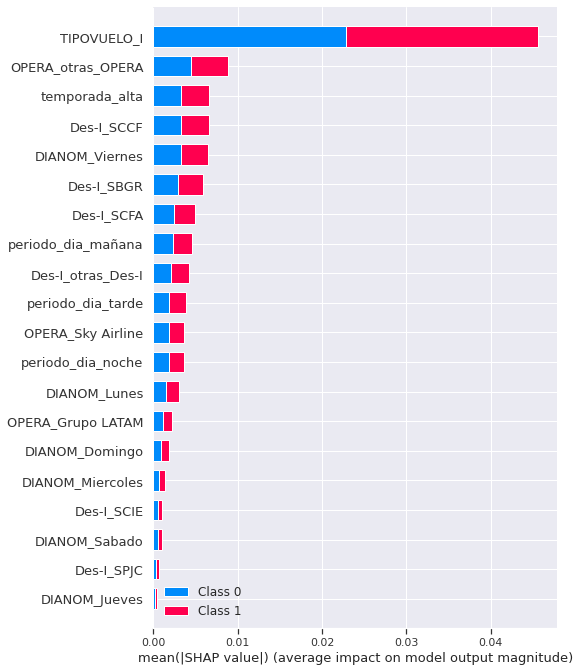

In [860]:

import shap
shap_values= shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values,X_train, plot_type='bar')

In [861]:
print(X_train.shape, X_test.shape)

(49737, 23) (18468, 23)


In [893]:
# las variables mas importante se repiten asi que para crear un modelo que se pueda explicar ocupare 9 de la mejores variables que haya obtenido 
# igual se ocupara select best para ver si una esta sobrando o no para unmejor scoring 

In [872]:
var_sel = ['TIPOVUELO_I',
 'OPERA_otras_OPERA',
 'temporada_alta',
 'Des-I_SCCF',
 'DIANOM_Viernes',
 'Des-I_SBGR',
 'Des-I_SCFA',
 'periodo_dia_mañana',
  'periodo_dia_tarde'   
]

In [873]:
X_train_1 = X_train[var_sel]
X_test_1 = X_test[var_sel]

In [874]:
X_train_1

,TIPOVUELO_I,OPERA_otras_OPERA,temporada_alta,Des-I_SCCF,DIANOM_Viernes,Des-I_SBGR,Des-I_SCFA,periodo_dia_mañana,periodo_dia_tarde
0,1,1,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
49733,0,1,1,0,0,0,0,0,1
49734,0,1,1,0,0,0,0,0,1
49735,0,1,1,0,0,0,0,0,1
66918,1,0,1,0,0,0,0,0,0


In [875]:
y_train.value_counts()

0    41300
1     8437
Name: atraso_15, dtype: int64

SE ocupo un gradiend boosting(LGBM) por que para mi dan los mejores resultados y tambien este en especial es rapido por que estoy ocupandola nube para programar en google colab necesito algo rapido y ocupo scoring f1 como tambien ROC_AUC  por que son los mas confiables para clasificar a mi gusto podria ocupar otros como accuracy o ks pero esto es lo mas rapido en el momento para 

In [876]:
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}
param_grid = {
    'selectkbest__k': [8,9],
    "lgbmclassifier__random_state": [42],
    'lgbmclassifier__max_depth' : [3,4,5],
  'lgbmclassifier__num_leaves' : list(range(5,8,2)),
    'lgbmclassifier__n_estimators' : [200],
    'lgbmclassifier__reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,1.6],
    'lgbmclassifier__reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6],
#     'lgbmclassifier__gamma': [0, 0.1, 0.2, 0.4,0.8, 25.6],
    

}


clf_best = LGBMClassifier()
kbest = SelectKBest()
pipe_best = make_pipeline(kbest,clf_best)
search_kbest = GridSearchCV(pipe_best, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='f1', verbose=1)
search_kbest.fit(X_train_1, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('lgbmclassifier', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbmclassifier__max_depth': [3, 4, 5],
                         'lgbmclassifier__n_estimators': [200],
                         'lgbmclassifier__num_leaves': [5, 7],
                         'lgbmclassifier__random_state': [42],
                         'lgbmclassifier__reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6],
                         'lgbmclassifier__reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                        1.6],
                         'selectkbest__k': [8, 9]},
             refit='f1', scoring={'AUC': 'roc_auc', 'f1': 'f1'}, verbose=1)

In [877]:
print(search_kbest.score(X_train_1, y_train))   
print(search_kbest.score(X_test_1, y_test))

0.043825610591189224
0.026599403806466405


In [880]:
search_kbest.best_estimator_.steps 

[('selectkbest', SelectKBest(k=9)),
 ('lgbmclassifier',
  LGBMClassifier(max_depth=3, n_estimators=200, num_leaves=5, random_state=42,
                 reg_alpha=0.2, reg_lambda=0))]

In [881]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

observar ROC tanto train como test

In [882]:
y_score = search_kbest.predict_proba(X_train_1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [883]:
y_score = search_kbest.predict_proba(X_test_1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

performance test ROC = 57
f1= 0.026
# para mejorar la performance deberia primero crear nuevas  variables (feature engineering) para eso tendria que saber mas que es lo mas importante que se atrase un vuelo deberia hablar con gente experta en el tema que me pudiera asesorar, tambien en la parte de modelos crear varios modelos y crear un voting selector como un stacking pero no tengo el poder computacional ahora en ese orden creo que lo mas importante es la data crear modelos datacentricos como dice Andrew Ng

In [884]:
best_pipe_cols = X_train_1.columns[search_kbest.best_estimator_[0].get_support()]

In [885]:
from sklearn.inspection import permutation_importance
def plot_feature_importance(data, result, save_path, name):
    sorted_idx = result.importances_mean.argsort()

    fig, ax = plt.subplots(figsize=(15,10))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=data.columns[sorted_idx])
    ax.set_title(f"Permutation Importances {name}")
    fig.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

In [886]:
best_pipe_cols

Index(['TIPOVUELO_I', 'OPERA_otras_OPERA', 'temporada_alta', 'Des-I_SCCF',
       'DIANOM_Viernes', 'Des-I_SBGR', 'Des-I_SCFA', 'periodo_dia_mañana',
       'periodo_dia_tarde'],
      dtype='object')

ver permutation importance para observar si las variables estan aportando al modelo 

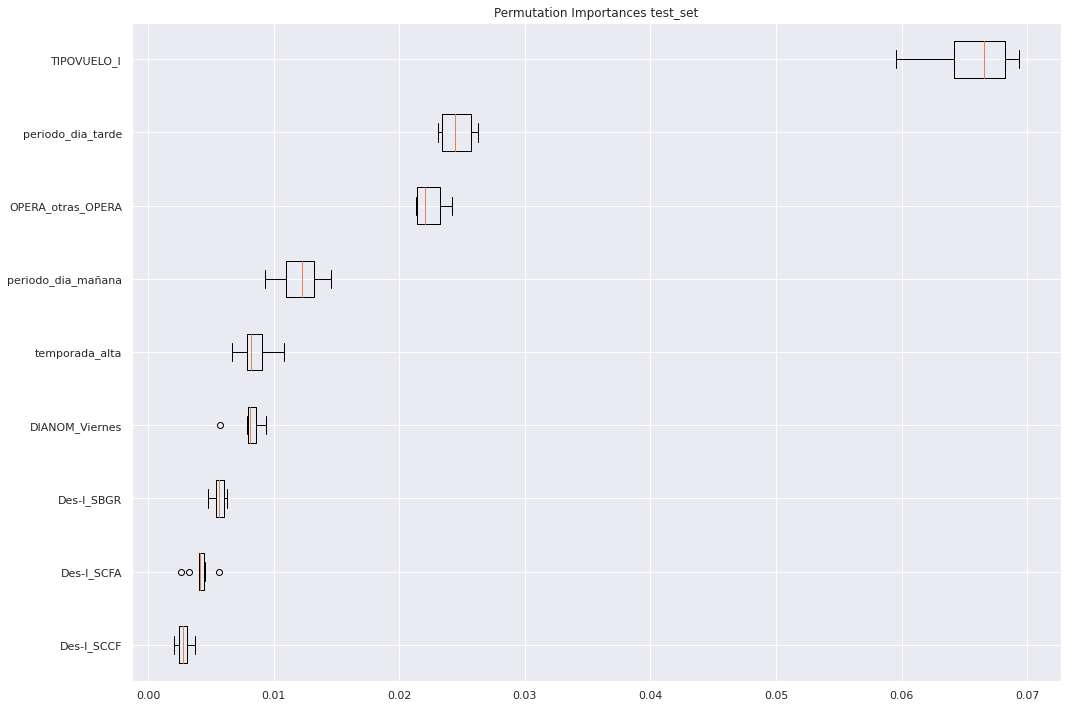

In [887]:
result_best_LGBM_cols_selected = permutation_importance(search_kbest.best_estimator_[1], X_train_1[best_pipe_cols], y_train, n_repeats=10, scoring='roc_auc', random_state=42, n_jobs=2)
plot_feature_importance(X_train_1[best_pipe_cols], result_best_LGBM_cols_selected,'/content/pi.png','test_set' )

In [888]:
model =LGBMClassifier(max_depth=3, n_estimators=200, num_leaves=5, random_state=42,
                 reg_alpha=0.2, reg_lambda=0) 
model.fit(X_train_1, y_train)

explainer = shap.TreeExplainer(model.fit(X_train_1, y_train))
shap_values = explainer.shap_values(X_test_1)

observar con shap beesworm como se distribuye los target dependiendo de los valores de  las variables  observamos que no cambia la importancia de las variables como se tenia anteriormente en mean shap values. El grafico de abajo es la version simplificada de este grafico da los valores absolutos 
las variables mas importante son : 


1.  TIPOVUELO_I
2. DIANOM_Viernes
3.temporada_alta
4.Opera_otras_OPERA
5.periodo_dia_tarde
6.periodo_dia_mañana
7.'Des-I_SCCF'
8.'Des-I_SCFA'
9. Des-I_SBGR





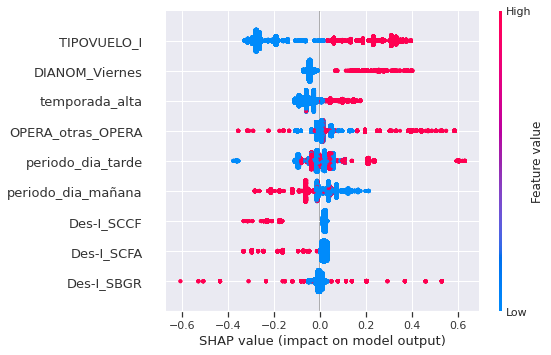

In [890]:

explainer = shap.TreeExplainer(model.fit(X_train_1, y_train))
shap_values = explainer.shap_values(X_test_1)
shap.summary_plot(shap_values[1],X_test_1)

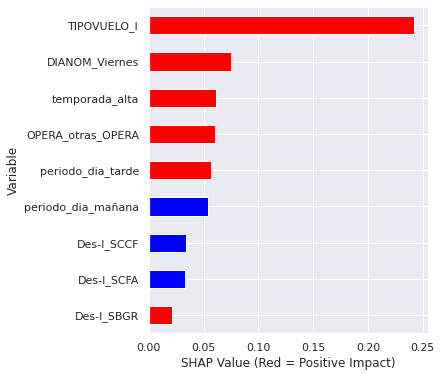

In [889]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values[1],X_test_1) 